<a href="https://colab.research.google.com/github/Logadarshana/Loga/blob/main/Hand_recog_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [10]:
#mnist is the dataset
mnist= tf.keras.datasets.mnist

In [11]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [12]:
print(x_train.shape, y_train.shape ,x_test.shape , y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


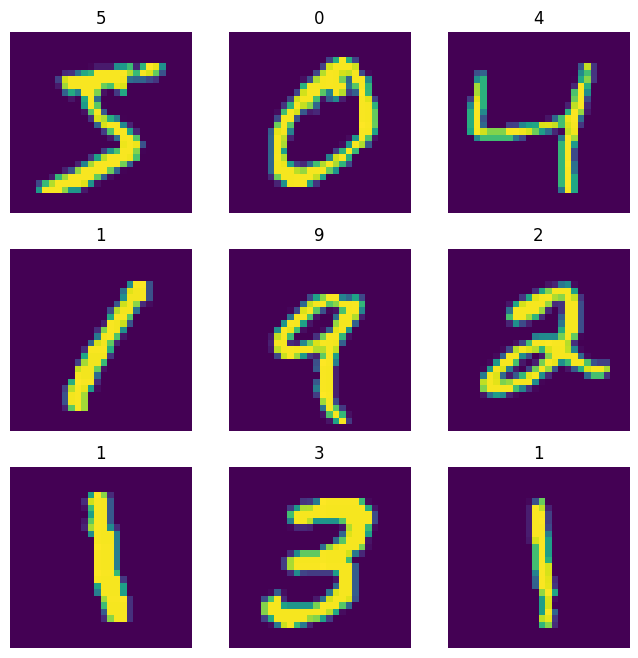

In [13]:
plt.figure(figsize=(8,8))
for i in range(9): #for ranfe in 9 images
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [14]:
x_train= tf.keras.utils.normalize(x_train, axis=0)
x_test= tf.keras.utils.normalize(x_test, axis=0)

**Building model**

In [16]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #10 digits for output

flatten: (28,28) -> make it 28*28 dimension

In [17]:
28*28

784

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer= 'adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs =15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 12s 6ms/step - loss: 0.6257 - accuracy: 0.8003 - val_loss: 0.4734 - val_accuracy: 0.8878
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2835 - accuracy: 0.9154 - val_loss: 0.3567 - val_accuracy: 0.9197
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2094 - accuracy: 0.9365 - val_loss: 0.2626 - val_accuracy: 0.9382
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1604 - accuracy: 0.9518 - val_loss: 0.2209 - val_accuracy: 0.9478
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1294 - accuracy: 0.9600 - val_loss: 0.1808 - val_accuracy: 0.9583
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1084 - accuracy: 0.9669 - val_loss: 0.1753 - val_accuracy: 0.9623
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0930 - accuracy: 0.9715 - val_loss: 0.1940 - val_accuracy: 0.95

In [21]:
import cv2

In [24]:
image= cv2.imread('3.png')[:,:,0]
image= np.invert(np.array([image]))

1/1 [==============================] - 0s 23ms/step
3


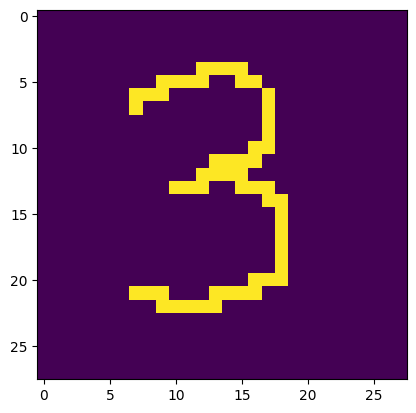

In [25]:
output= model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [26]:
model.save('/content/hand_written_Digit_recog_model.keras')

In [27]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [32]:
!streamlit run /content/app.py &> /content/logs.txt &

In [33]:
!npx localtunnel --port 8501

npx: installed 22 in 2.219s
your url is: https://some-cases-drive.loca.lt
^C
